Устанавливаем библиотеку PyTorch

In [1]:
%pip install torch


     ------------------------------------- 172.3/172.3 MB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 18.4 MB/s eta 0:00:00
     ------------------------------------- 536.2/536.2 KB 11.2 MB/s eta 0:00:00


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Импортирую необходимые библиотеки

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [35]:
#Загружаем данные
data = pd.read_csv('diabetes.csv')

In [37]:
#Разделяем данные
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

In [38]:
#Нормализуем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
#Разделяем данные на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#Конвертируем данные в тензоры PyTorch
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [41]:
#Определяем нейронные сети 
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(8, 16)
        self.fc2 = nn.Linear(16, 2)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(8, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 2)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(8, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 2)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.fc1 = nn.Linear(8, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 2)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

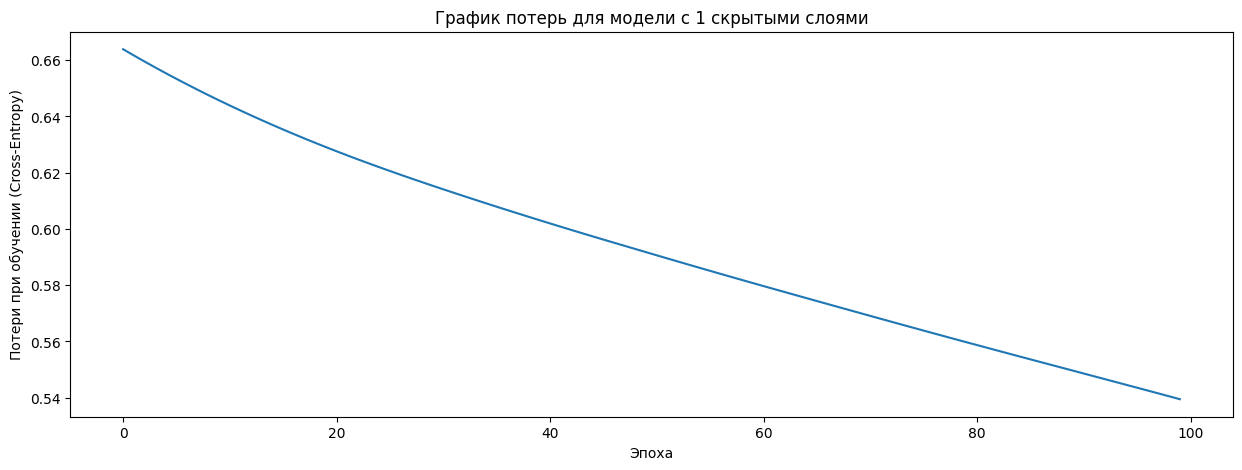

Точность модели с 1 скрытыми слоями: 0.7207792207792207


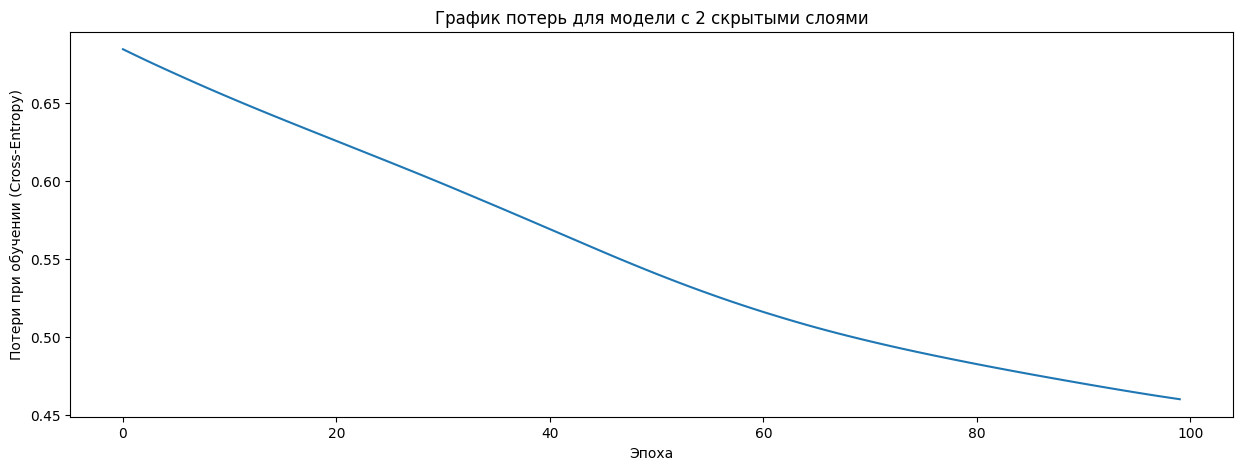

Точность модели с 2 скрытыми слоями: 0.7467532467532467


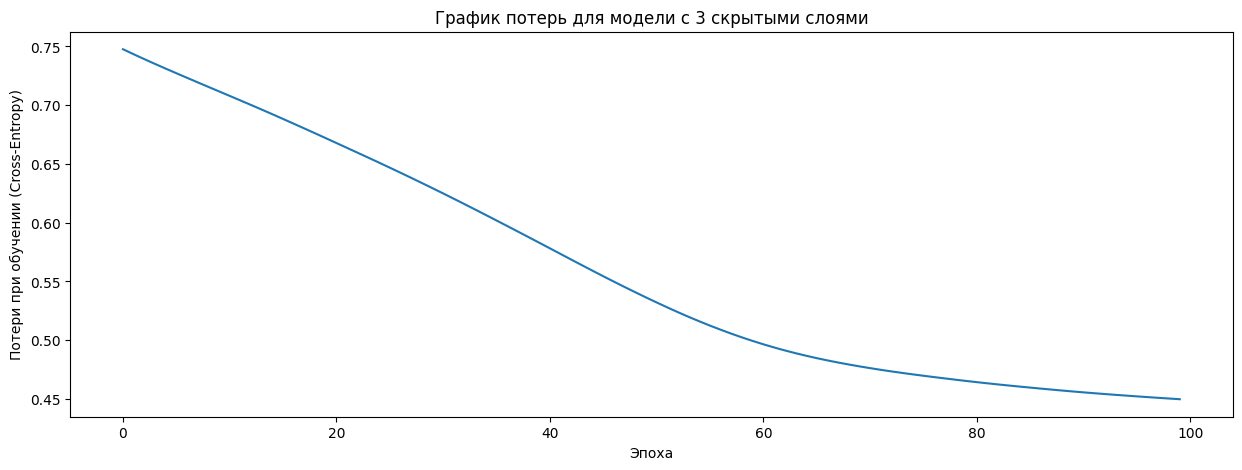

Точность модели с 3 скрытыми слоями: 0.7532467532467533


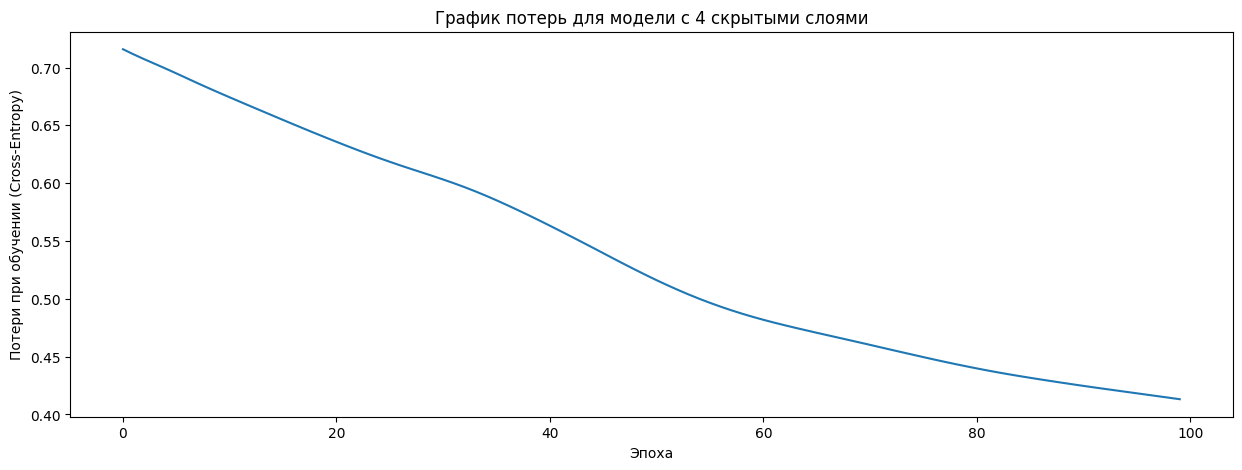

Точность модели с 4 скрытыми слоями: 0.7207792207792207


In [46]:
#Выполняем процесс обучения и оценки моделей
for Net in [Net1, Net2, Net3, Net4]:
    model = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_curve = []

    for epoch in range(100):
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        loss_curve.append(loss.item())
    #Отображаем график потерь
    plt.figure(figsize=(15,5))
    plt.plot(loss_curve)
    plt.xlabel("Эпоха")
    plt.ylabel("Потери при обучении (Cross-Entropy)")
    plt.title(f"График потерь для модели с {len(list(model.children()))-1} скрытыми слоями")
    plt.show()

    with torch.no_grad():
        y_pred = model(X_test)
        y_pred = torch.argmax(y_pred, axis=1)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Точность модели с {len(list(model.children()))-1} скрытыми слоями: {accuracy}")